In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle
import re

In [2]:
# Set path to ARI tests
path = 'consistency-tests/ARI_testing/'
dirlist = sorted(os.listdir(path))
goodDirs = []
pattern = r'(clusts_\d_)?batches_100_trials_20_iter_cutoff_1_acc_cutoff_\d+_test_runs_100\b'
for idx, i in enumerate(dirlist):
    match = re.match(pattern, dirlist[idx])
    if match:
#         print("Match found!")
        goodDirs.append(i)
    
'''
Make N rows with M boxplots where N is the Cluster number and M is the
different cutoffs used. Maybe use an sns boxplot with df
'''
dfDict = {6:[], 7:[], 8:[]}
handle = 'final_ARIs_Accumulative.csv'
for folder in goodDirs:
    numberPattern = r'\d+' # Number matching pattern
    matches = re.findall(numberPattern, folder) # find list of matches in folder
    if len(matches) >= 6: 
        clusts = int(matches[0])
    else:
        clusts = 8
    colname = matches[-2] # Variable number of species to cutoff
    df = pd.read_csv(path+folder+"/accumulative/"+handle, index_col=0)
    df.columns = [int(colname)]
    dfDict[clusts].append(df)

'''
Make dicts holding data for ARI boxplots
'''
dataDict = {k:[] for k in dfDict.keys()}
for k in list(dfDict.keys()):
    dfs = sorted(dfDict[k], key = lambda x:x.columns[0])
    boxplot_data = pd.concat(dfs, axis=1)
    dataDict[k] = boxplot_data

Text(0.06, 0.5, 'ARI (Higher is better)')

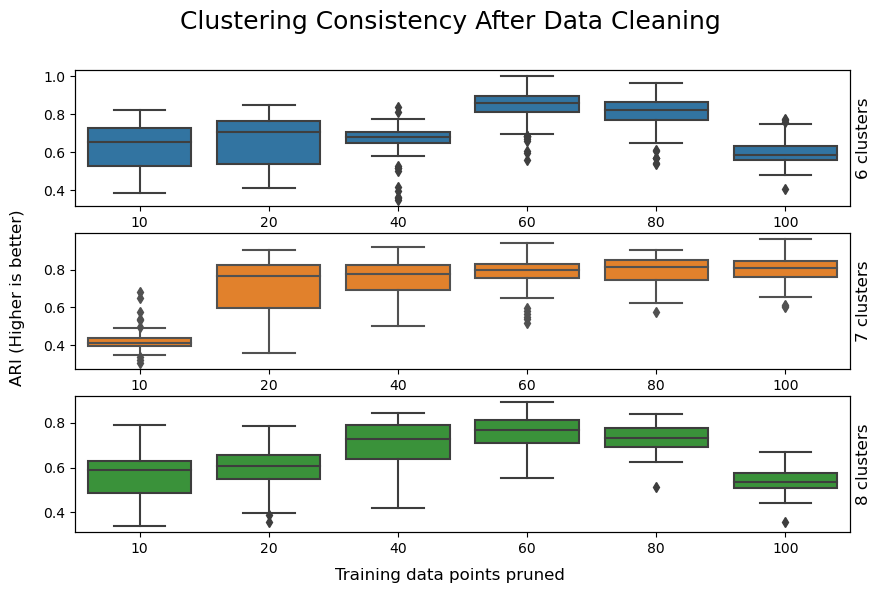

In [57]:
# Make boxplot
fig, axs = plt.subplots((3), figsize=(10, 6))
colors = sns.color_palette()
fig.suptitle("Clustering Consistency After Data Cleaning", fontsize=18)
for idx, key in enumerate(dataDict.keys()):
    ax = axs[idx]
    ax2 = ax.twinx()
    ax2.set_ylabel(f"{key} clusters", fontsize=12)
    ax2.set_yticks([])
    sns.boxplot(dataDict[key], ax=ax, color=colors[idx])
fig.text(0.5, 0.03, 'Training data points pruned', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'ARI (Higher is better)', va='center', rotation='vertical', fontsize=12)
# fig.text(0.96, 0.5, 'Cluster Number', va='center', rotation='vertical')
